<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/PSD_histogram_abril_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     115    4.887788   42.937538  ...   62.228127   82.863434   98.878258
1     151    1.713478    1.062629  ...   31.351871   30.429321   28.864481
2     122  116.287552  117.957535  ...    0.000000    0.000000    0.000000
3     165   87.267403   88.717545  ...   59.711227   55.926937   52.065422
4     157  114.302483  114.038620  ...   20.326748   20.609196   22.152542
5     166   65.057335   73.046005  ...   90.043549   92.882561   90.485695
6     192  104.579857  107.234802  ...   41.308594   40.270828   32.210068
7     152   43.723682   32.319946  ...  127.026314  127.328949  122.109421
8     164  100.493759   96.118973  ...    6.382510    6.301012    6.176085
9     186   91.792122  101.136559  ...    1.869465    0.777547    0.791190
10    103   17.500706    7.077481  ...   73.287109   73.040710   73.566872
11    180   97.502708   93.366425  ...    9.167408    6.458272    6.316544
12    180   39.071606   5

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
3   180.0   31.674572   34.286423  ...  116.056305  128.465683  140.763474
7   135.0   31.798899   32.345951  ...    0.816845    0.013992    0.721920
29  122.0   16.843321   18.071484  ...   97.373291  102.479973  108.003220
9   120.0   87.041122   86.066673  ...   41.434448   50.097778   63.225555
15  146.0    0.261775    0.784575  ...    0.000000    0.000000    0.000000
26  181.0    0.911938    0.828241  ...  107.285553  107.176895  109.236534
41  127.0    6.364623    5.371381  ...   37.147499   38.038380   39.166901
47  197.0   60.456730   63.081432  ...   53.422096   59.112865   79.182175
8   182.0   90.751480   86.195274  ...   58.857990   63.650894   65.284027
22  197.0    4.728027    5.362932  ...   90.450005   89.722321   90.942963
36  111.0   37.006737   37.464172  ...  115.160141  119.324486  124.897568
42  197.0   60.189777   64.387520  ...   95.557350   72.755089   67.434509
10  174.0  111.659943  10

In [13]:
Width=np.array(Width_new)

In [14]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [15]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [16]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [17]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,180.0,31.674572,34.286423,27.984200,18.503212,6.501235,2.946667,1.448889,1.429630,1.002469,1.000000,1.103704,0.280988,0.502222,0.083951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157531,0.295309,0.000000,0.008395,0.632593,1.218765,57.338768,59.865685,59.083954,57.958031,49.368401,30.951115,12.684938,4.266667,1.705679,1.141235,0.975802,...,83.703217,83.460251,83.262718,84.646423,88.653831,91.768410,102.280006,107.411873,106.598030,112.907669,124.360992,129.785675,58.805439,56.381729,56.376297,57.028152,60.090374,60.762478,61.865189,67.287910,73.574821,74.091858,72.465195,76.811363,75.664200,77.841980,82.380249,82.473587,83.569382,83.220253,83.943710,84.292847,86.146179,85.744698,98.616806,108.306679,110.657784,116.056305,128.465683,140.763474
7,135.0,31.798899,32.345951,40.048721,42.747215,42.882195,41.077316,41.971409,42.624580,50.800053,72.412338,66.611298,50.896187,49.742168,49.089546,48.401588,48.254429,46.435715,44.334103,44.866390,43.820580,42.541397,38.545570,26.652727,5.380960,1.252675,0.821289,0.363786,0.000000,35.386501,35.998077,42.928501,45.035282,44.501396,45.228863,48.598244,48.909901,68.609322,79.167137,70.115280,...,54.502552,51.845650,50.638794,51.288006,56.501560,59.188309,51.536461,32.672920,6.199232,0.908148,0.516927,0.534815,52.772617,52.374378,51.436813,50.344467,47.750011,45.930534,49.363121,51.919945,51.355991,50.559174,50.876709,52.993137,53.862659,54.227215,53.548473,51.591599,50.447128,50.005867,50.523781,52.077694,57.518074,57.380791,51.256622,29.591221,8.078189,0.816845,0.013992,0.721920
29,122.0,16.843321,18.071484,20.665949,20.466002,22.093790,35.327332,61.546360,88.880402,107.578339,114.820473,116.783119,118.793327,120.449074,121.138672,119.817245,120.191345,120.509003,118.046227,109.670784,107.836876,107.385910,102.402847,93.856209,73.674553,46.575653,37.808117,36.069336,34.987904,20.762699,21.641495,22.370329,23.480785,24.371674,27.103735,42.807312,78.225212,101.893303,110.856491,112.937378,...,54.988983,35.652779,17.880945,18.938189,25.425423,26.405270,53.968555,78.117439,87.091644,96.883629,102.947060,109.458214,191.745758,217.609772,150.712433,15.739586,20.292124,35.121471,35.761623,36.958611,35.814293,33.561138,33.707069,36.621872,42.610321,49.591774,52.050793,51.084919,45.065304,32.238106,21.094059,25.045151,27.618919,28.319267,58.157753,78.993546,87.726418,97.373291,102.479973,108.003220
9,120.0,87.041122,86.066673,84.397781,84.501114,86.203339,88.107780,87.183334,86.708885,86.793335,87.388885,86.971115,87.083328,86.690002,87.675552,88.303329,90.213333,92.083336,93.803329,92.866669,92.760002,89.427780,86.501106,82.110001,87.031105,122.874451,120.017784,121.142220,114.436661,86.411110,85.015564,82.776672,82.696663,84.495560,85.941109,86.566666,87.290001,87.201111,87.021111,88.291115,...,74.854446,86.081116,89.233330,86.241112,78.584450,68.315559,55.758888,40.756668,39.564442,37.871113,38.226669,43.847775,119.507774,123.116669,127.846672,130.752228,133.033325,131.376678,124.027771,110.098892,91.226669,80.250000,72.392227,67.487778,69.146667,68.713333,64.964447,68.543335,70.834442,81.173340,87.276665,87.417786,78.455551,64.776672,48.632225,37.011116,36.873333,41.434448,50.097778,63.225555
15,146.0,0.261775,0.784575,0.926440,1.000000,0.668418,0.031526,0.556952,0.257459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044661,0.028898,0.000000,0.210171,0.157628,0.000000,0.000000,0.165885,0.102083,0.044661,0.000000,0.000000,0.000000,0.000000,0.224995,0.600676,0.377744,0.855132,0.668043,0.200038,0.091950,0.082192,0.082192,0.118972,0.168887,...,44.997372,54.690750,59.010136,49.394447,15.211859,0.956652,0.246575,0.000000,0.000000,0.000000,0.000000,0.000000,140.114090,143.048599,140.2756

In [18]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


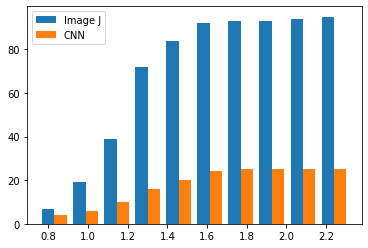

In [20]:
plt.hist([Diam1,Diameter_All],)
plt.legend(['Image J','CNN'])